In [82]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

player = {'Season' : 0, 'Name' : '', 'Position' : '', 'Age' : 0, 'Fee (€ 1Th)' : 0}
player_df = pd.DataFrame(columns=['Season', 'Name', 'Position', 'Age', 'Fee (€ 1Th)'])
stats = {'Season' : 0, 'Name' : '', 'Position' : '', 'Age' : 0, 
         'Competition' : '', 'Appearances' : 0, 'Goals' : 0, 'Assists' : 0, 'Yellow_cards' : 0,
         'Second_yellow_cards' : 0, 'Red_cards' : 0, 'Penalty_goals' : 0, 
         'Minutes_per_goal' : 0, 'Minutes_played' : 0}
stats_df = pd.DataFrame(columns=stats.keys())
stats_df

,Season,Name,Position,Age,Competition,Appearances,Goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played


In [83]:
for page in range(1, 21):
    url = f'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop?ajax=yw1&page={page}'
    header = {
        'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'
    }
    
    seed = np.random.randint(100) 
    np.random.seed(seed) 
    a = np.random.randint(2) 
    time.sleep(a) 

    resp = requests.get(url, headers = header)
    html = BeautifulSoup(resp.text, 'html.parser')

    for item in html.find_all('tr', class_ = ['odd', 'even']):
        player['Name'] = item.find_all('td')[3].text
        player['Position'] =item.find_all('td')[4].text
        age_22 =int(item.find_all('td')[5].text)
    
        item_url = 'https://www.transfermarkt.com' + item.find_all('td')[3].find('a').attrs['href']
        detail_referer = item_url.replace('profil', 'detaillierteleistungsdaten')
        detail_url = detail_referer + '/plus/1'
               
                    
        seed = np.random.randint(100) 
        np.random.seed(seed) 
        a = np.random.randint(2) 
        time.sleep(a)
        
        header = {
            'referer' : 'https://www.transfermarkt.com/spieler-statistik/wertvollstespieler/marktwertetop',
            'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'   
        }
        
        item_resp = requests.get(item_url, headers = header)
        
        item_html = BeautifulSoup(item_resp.text, 'html.parser')
        
        for season_item, fee_item in zip(item_html.find_all('div', class_='tm-player-transfer-history-grid__season')[1 : -1], item_html.find_all('div', class_='tm-player-transfer-history-grid__fee')[1 : -1]):            
            fee_col = fee_item.text.strip()
            season_col = season_item.text.strip()
            
            if '/' in season_col:
                season = int('20' + season_col.split('/')[0])
            else:
                season = int(season_col)
                
            player['Season'] = season
            player['Age'] = age_22 - (2022 - season)
            
            try:
                if fee_col[0] == '€' and fee_col.find('m') != -1:
                    fee_ = fee_col.split('.')
                    fee = int(fee_[0][1 : ] + fee_[1][ : -1]) * 10
                    player['Fee (€ 1Th)'] = fee
                elif fee_col[0] == '€' and fee_col.find('Th'):
                    fee_ = fee_col.split('Th')
                    fee = int(fee_[0][1 : ])
                    player['Fee (€ 1Th)'] = fee
                else:
                    continue
#                 print(player)
                player_df = player_df.append(player, ignore_index=True)
            except:
                pass
            
        header_detail = {
            'header' : detail_referer,
            'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'
        }
        
        seed = np.random.randint(100) 
        np.random.seed(seed) 
        a = np.random.randint(2) 
        time.sleep(a)
        
        detail_resp = requests.get(detail_url, headers = header)
        detail_html = BeautifulSoup(detail_resp.text, 'html.parser')
        
        stats['Name'] = player['Name']
        stats['Position'] = player['Position']
        
        for box in detail_html.find_all('div', class_='box')[1 : ]:
            datas = box.find_all('tr', class_=['odd', 'even'])
            
            for data in datas:
                for index, col in enumerate(data.find_all('td')):
                    if index == 0:
                        if '/' in col.text.strip():
                            stats['Season'] = int('20' + col.text.strip().split('/')[0])
                        else:
                            stats['Season'] = int(col.text.strip())
                        stats['Age'] = age_22 - (2022 - stats['Season'])
                    elif index == 2:
                        stats['Competition'] = col.find('a').text.strip()
                    elif index == 4:
                        try:
                            stats['Appearances'] = int(col.find('a').text.strip())
                        except:
                            stats['Appearances'] = 0
                    elif index == 5:
                        try:
                            stats['Goals'] = int(col.text.strip())
                        except:
                            stats['Goals'] = 0
                    elif index == 6:
                        try:
                            stats['Assists'] = int(col.text.strip())
                        except:
                            stats['Assists'] = 0

                    elif index == 10:
                        try:
                            stats['Yellow_cards'] = int(col.text.strip())
                        except:
                            stats['Yellow_cards'] = 0
                    elif index == 11:
                        try:
                            stats['Second_yellow_cards'] = int(col.text.strip())
                        except:
                            stats['Second_yellow_cards'] = 0
                    elif index == 12:
                        try:
                            stats['Red_cards'] = int(col.text.strip())
                        except:
                            stats['Red_cards'] = 0
                    elif index == 13:
                        try:
                            stats['Penalty_goals'] = int(col.text.strip())
                        except:
                            stats['Penalty_goals'] = 0
                    elif index == 14:
                        if "'" in col.text:
                            if (".") in col.text:
                                stats['Minutes_per_goal'] = int(col.text.strip().split('.')[0])
                            else:
                                stats['Minutes_per_goal'] = int(col.text.strip().split("'")[0])
                        else:
                            stats['Minutes_per_goal'] = 0
                    elif index == 15:
                        if "'" in col.text:
                            if "." in col.text:
                                stats['Minutes_played'] = int(col.text.strip().split('.')[0])
                            else:
                                stats['Minutes_played'] = int(col.text.strip().split("'")[0])
                        else:
                            stats['Minutes_played'] = 0
                stats_df = stats_df.append(stats, ignore_index=True)
#                 print(stats)
                
            
    



In [84]:
stats_df

,Season,Name,Position,Age,Competition,Appearances,Goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played
0,2022,Kylian Mbappé,Centre-Forward,23,Ligue 1,6,7,0,1,0,0,0,71,497
1,2021,Kylian Mbappé,Centre-Forward,22,Ligue 1,35,28,19,10,0,0,4,108,3
2,2020,Kylian Mbappé,Centre-Forward,21,Ligue 1,31,27,7,5,0,0,6,88,2
3,2019,Kylian Mbappé,Centre-Forward,20,Ligue 1,20,18,7,0,0,0,0,84,1
4,2018,Kylian Mbappé,Centre-Forward,19,Ligue 1,29,33,9,6,0,1,1,70,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15340,2019,Giorgian de Arrascaeta,Attacking Midfield,25,Libertadores,11,1,3,0,0,0,0,673,673
15341,2018,Giorgian de Arrascaeta,Attacking Midfield,24,Libertadores,9,3,1,0,0,0,0,252,757
15342,2017,Giorgian de Arrascaeta,Attacking Midfield,23,Copa Sudamericana,2,0,1,0,0,0,0,0,180
15343,2015,Giorgian de Arrascaeta,Attacking Midfield,21,Libertadores,10,1,1,0,0,0,0,745,745


In [85]:
player_df

,Season,Name,Position,Age,Fee (€ 1Th)
0,2018,Kylian Mbappé,Centre-Forward,19,180000
1,2022,Erling Haaland,Centre-Forward,22,60000
2,2019,Erling Haaland,Centre-Forward,19,20000
3,2018,Erling Haaland,Centre-Forward,18,8000
4,2016,Erling Haaland,Centre-Forward,16,100
...,...,...,...,...,...
837,2021,José Sá,Goalkeeper,28,8000
838,2019,José Sá,Goalkeeper,26,2500
839,2015,José Sá,Goalkeeper,22,1200
840,2018,Giorgian de Arrascaeta,Attacking Midfield,24,15000


In [86]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Season       842 non-null    object
 1   Name         842 non-null    object
 2   Position     842 non-null    object
 3   Age          842 non-null    object
 4   Fee (€ 1Th)  842 non-null    object
dtypes: object(5)
memory usage: 33.0+ KB


In [87]:
player_df.describe()

,Season,Name,Position,Age,Fee (€ 1Th)
count,842,842,842,842,842
unique,19,425,13,21,339
top,2019,Ciro Immobile,Centre-Forward,22,15000
freq,133,7,156,117,31


In [88]:
stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15345 entries, 0 to 15344
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Season               15345 non-null  object
 1   Name                 15345 non-null  object
 2   Position             15345 non-null  object
 3   Age                  15345 non-null  object
 4   Competition          15345 non-null  object
 5   Appearances          15345 non-null  object
 6   Goals                15345 non-null  object
 7   Assists              15345 non-null  object
 8   Yellow_cards         15345 non-null  object
 9   Second_yellow_cards  15345 non-null  object
 10  Red_cards            15345 non-null  object
 11  Penalty_goals        15345 non-null  object
 12  Minutes_per_goal     15345 non-null  object
 13  Minutes_played       15345 non-null  object
dtypes: object(14)
memory usage: 1.6+ MB


In [89]:
stats_df.describe()

,Season,Name,Position,Age,Competition,Appearances,Goals,Assists,Yellow_cards,Second_yellow_cards,Red_cards,Penalty_goals,Minutes_per_goal,Minutes_played
count,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345,15345
unique,21,500,13,24,307,47,44,23,16,4,59,24,896,962
top,2021,Cristiano Ronaldo,Centre-Back,20,Champions League,1,0,0,0,0,0,0,0,1
freq,1895,83,2578,1719,1544,3058,8806,9521,8765,14914,14469,13885,8290,1467


In [90]:
stats_df.to_excel('player_stats.xlsx')

In [91]:
player_df.to_excel('player_fee.xlsx')

In [7]:
!pip install webdriver_manager

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install selenium

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

In [33]:
from selenium import webdriver
from bs4 import BeautifulSoup

driver = webdriver.Chrome()

In [34]:
url = 'https://1xbet.whoscored.com/Statistics'
driver.get(url)

In [18]:
Player_dict = {
    'Season' : 0,
    'Name' : '',
    'Appearances' : '',
    'Minutes_played' : '', 
    'Goals' : '',
    'Assists' : '',
    'Yellow_cards' : '',
    'Red_cards' : '',
    'Shots_per_game' : '',
    'Pass_success_percentage' : '',
    'AerialsWone' : '',
    'MotM' : '',
    'Rating' : ''
}

whoscored_df = pd.DataFrame(columns=Player_dict.keys())
whoscored_df

,Season,Name,Appearances,Minutes_played,Goals,Assists,Yellow_cards,Red_cards,Shots_per_game,Pass_success_percentage,AerialsWone,MotM,Rating


In [15]:
driver.find_element(By.XPATH, '//*[@id="statistics-paging-summary"]/div/dl[2]/dd[3]').click()

In [36]:
for page in range(22, 142):
    for row in range(1, 11):
        for next in range(page):
            driver.find_element(By.XPATH, '//*[@id="statistics-paging-summary"]/div/dl[2]/dd[3]').click()
            seed = np.random.randint(100) 
            np.random.seed(seed) 
            a = np.random.randint(5, 6) 
            time.sleep(a)   
        
        Player_dict['Name'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]/a[1]/span').text.strip()
        driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]/a[1]/span').click()
        seed = np.random.randint(100) 
        np.random.seed(seed) 
        a = np.random.randint(3, 5) 
        time.sleep(a)
        driver.find_element(By.XPATH, f'//*[@id="sub-navigation"]/ul/li[4]/a').click()
        seed = np.random.randint(100) 
        np.random.seed(seed) 
        a = np.random.randint(3, 5) 
        time.sleep(a)
        
        for row in range(1, 50):
            if 'Total' in driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]').text:
                break
            
            if '/' in driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]').text:
                Player_dict['Season'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]').text.split('/')[0])
            else:
                try:
                    Player_dict['Season'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]').text)
                except:
                    Player_dict['Season'] = 0
            if '(' in driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[6]').text:
                Player_dict['Appearances'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[6]').text.split('(')[0])
            else:
                try:
                    Player_dict['Appearances'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[6]').text)
                except:
                    Player_dict['Appearances'] = 0
            try:
                Player_dict['Minutes_played'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[7]').text.strip())
            except:
                Player_dict['Minutes_played'] = 0
                
            try:
                Player_dict['Goals'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[8]').text.strip())
            except:
                Player_dict['Goals'] = 0 
            
            try:
                Player_dict['Assists'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[9]').text.strip())
            except:
                Player_dict['Assists'] = 0 
                
            try:
                Player_dict['Yellow_cards'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[10]').text.strip())
            except:
                Player_dict['Yellow_cards'] = 0 
            
            try:
                Player_dict['Red_cards'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[11]').text.strip())
            except:
                Player_dict['Red_cards'] = 0 
            
            try:
                Player_dict['Shots_per_game'] = float(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[12]').text.strip())
            except:
                Player_dict['Shots_per_game'] = 0 
                
            try:
                Player_dict['Pass_success_percentage'] = float(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[13]').text.strip())
            except:
                Player_dict['Pass_success_percentage'] = 0
                
            try:
                Player_dict['AerialsWone'] = float(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[14]').text.strip())
            except:
                Player_dict['AerialsWone'] = 0 
                
            try:
                Player_dict['MotM'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[15]').text.strip())
            except:
                Player_dict['MotM'] = 0 
                
            try:
                Player_dict['Rating'] = float(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[16]').text.strip())
            except:
                Player_dict['Rating'] = 0 
#             print(Player_dict)
            whoscored_df = whoscored_df.append(Player_dict, ignore_index=True)
            
#         print(Player_dict)
        driver.back()
        seed = np.random.randint(100) 
        np.random.seed(seed) 
        a = np.random.randint(3, 5) 
        time.sleep(a)
        driver.back()
        seed = np.random.randint(100) 
        np.random.seed(seed) 
        a = np.random.randint(3, 5) 
        time.sleep(a)
                                                           

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=105.0.5195.102)
Stacktrace:
Backtrace:
	Ordinal0 [0x0073DF13+2219795]
	Ordinal0 [0x006D2841+1779777]
	Ordinal0 [0x005E423D+803389]
	Ordinal0 [0x005E6D04+814340]
	Ordinal0 [0x005E6BC2+814018]
	Ordinal0 [0x005E6E50+814672]
	Ordinal0 [0x00619767+1021799]
	Ordinal0 [0x006178C4+1013956]
	Ordinal0 [0x006154AB+1004715]
	Ordinal0 [0x00614117+999703]
	Ordinal0 [0x00609B76+957302]
	Ordinal0 [0x0062E7FC+1107964]
	Ordinal0 [0x006094B4+955572]
	Ordinal0 [0x0062EA14+1108500]
	Ordinal0 [0x0063F192+1175954]
	Ordinal0 [0x0062E616+1107478]
	Ordinal0 [0x00607F89+950153]
	Ordinal0 [0x00608F56+954198]
	GetHandleVerifier [0x00A32CB2+3040210]
	GetHandleVerifier [0x00A22BB4+2974420]
	GetHandleVerifier [0x007D6A0A+565546]
	GetHandleVerifier [0x007D5680+560544]
	Ordinal0 [0x006D9A5C+1808988]
	Ordinal0 [0x006DE3A8+1827752]
	Ordinal0 [0x006DE495+1827989]
	Ordinal0 [0x006E80A4+1867940]
	BaseThreadInitThunk [0x7714FA29+25]
	RtlGetAppContainerNamedObjectPath [0x776E7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x776E7A6E+238]


In [62]:
driver.find_element(By.XPATH, '//*[@id="statistics-paging-summary"]/div/dl[2]/dd[3]').click()

In [66]:
for page in range(100):
    for r in range(1, 3):
        link = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{r}]/td[1]/a[1]').get_attribute("href")
        driver.execute_script('window.open("https://google.com");')  #구글 창 새 탭으로 열기
        time.sleep(1)

        driver.switch_to.window(driver.window_handles[-1])  #새로 연 탭으로 이동
        driver.get(link)
        time.sleep(0.5)
        driver.switch_to.window(driver.window_handles[0])
    seed = np.random.randint(100) 
    np.random.seed(seed) 
    a = np.random.randint(2, 3) 
    time.sleep(a)
    for tab in driver.window_handles[1 : ]:
        driver.switch_to.window(window_name=tab)

        Player_dict['Name'] = driver.find_element(By.XPATH, f'//*[@id="layout-wrapper"]/div[3]/div[1]/div[1]/h1').text.strip()
    #     print(Player_dict['Name'])
        driver.find_element(By.XPATH, f'//*[@id="sub-navigation"]/ul/li[4]/a').click()
        seed = np.random.randint(100) 
        np.random.seed(seed) 
        a = np.random.randint(2, 3) 
        time.sleep(a)

        for row in range(1, 50):
            if 'Total' in driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]').text:
                break

            if '/' in driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]').text:
                Player_dict['Season'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]').text.split('/')[0])
            else:
                try:
                    Player_dict['Season'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]').text)
                except:
                    Player_dict['Season'] = 0
            if '(' in driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[6]').text:
                Player_dict['Appearances'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[6]').text.split('(')[0])
            else:
                try:
                    Player_dict['Appearances'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[6]').text)
                except:
                    Player_dict['Appearances'] = 0
            try:
                Player_dict['Minutes_played'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[7]').text.strip())
            except:
                Player_dict['Minutes_played'] = 0

            try:
                Player_dict['Goals'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[8]').text.strip())
            except:
                Player_dict['Goals'] = 0 

            try:
                Player_dict['Assists'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[9]').text.strip())
            except:
                Player_dict['Assists'] = 0 

            try:
                Player_dict['Yellow_cards'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[10]').text.strip())
            except:
                Player_dict['Yellow_cards'] = 0 

            try:
                Player_dict['Red_cards'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[11]').text.strip())
            except:
                Player_dict['Red_cards'] = 0 

            try:
                Player_dict['Shots_per_game'] = float(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[12]').text.strip())
            except:
                Player_dict['Shots_per_game'] = 0 

            try:
                Player_dict['Pass_success_percentage'] = float(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[13]').text.strip())
            except:
                Player_dict['Pass_success_percentage'] = 0

            try:
                Player_dict['AerialsWone'] = float(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[14]').text.strip())
            except:
                Player_dict['AerialsWone'] = 0 

            try:
                Player_dict['MotM'] = int(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[15]').text.strip())
            except:
                Player_dict['MotM'] = 0 

            try:
                Player_dict['Rating'] = float(driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[16]').text.strip())
            except:
                Player_dict['Rating'] = 0 
        #             print(Player_dict)
            whoscored_df = whoscored_df.append(Player_dict, ignore_index=True)
        driver.close()
    driver.switch_to.window(window_name=driver.window_handles[0])
    time.sleep(1)
    driver.find_element(By.XPATH, '//*[@id="statistics-paging-summary"]/div/dl[2]/dd[3]').click()
    seed = np.random.randint(100) 
    np.random.seed(seed) 
    a = np.random.randint(7, 9) 
    time.sleep(a)

KeyboardInterrupt: 

In [71]:
test = whoscored_df
test = test.drop_duplicates(keep = 'first')
test

,Season,Name,Appearances,Minutes_played,Goals,Assists,Yellow_cards,Red_cards,Shots_per_game,Pass_success_percentage,AerialsWone,MotM,Rating
0,2022,Lionel Messi,7,620,3,7,0,0,4.6,83.4,0,4,8.91
1,2022,Lionel Messi,1,84,0,0,0,0,2.0,93.0,0,0,7.18
2,2021,Lionel Messi,24,2153,6,14,0,0,3.4,86.7,0.2,5,7.77
3,2021,Lionel Messi,7,630,5,0,1,0,3.7,87.4,0.3,2,7.73
4,2020,Lionel Messi,33,3023,30,9,4,0,5.6,85.1,0.2,22,8.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15979,2020,Léo Jardim,34,3060,0,0,4,0,0.0,47.1,0.2,2,6.70
15980,2019,Léo Jardim,0,18,0,0,0,0,0.0,40.0,0,0,6.37
15981,2018,Léo Jardim,33,2970,0,0,2,0,0.0,61.7,0.5,2,6.62
15982,2017,Léo Jardim,4,373,0,0,0,0,0.0,40.6,0.2,1,6.52


In [72]:
test.to_excel('player_history.xlsx')

In [100]:
for row in range(1, 3):
    Player_dict['Name'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[1]/a[1]/span').text.strip()
    Player_dict['Apps'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[3]').text.strip()
    Player_dict['Mins'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[4]').text.strip()
    Player_dict['Goals'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[5]').text.strip()
    Player_dict['Assists'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[6]').text.strip()
    Player_dict['Yel'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[7]').text.strip()
    Player_dict['Red'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[8]').text.strip()
    Player_dict['SpG'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[9]').text.strip()
    Player_dict['PS%'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[10]').text.strip()
    Player_dict['AAerialsWone'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[11]').text.strip()
    Player_dict['MotM'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[12]').text.strip()
    Player_dict['Rating'] = driver.find_element(By.XPATH, f'//*[@id="player-table-statistics-body"]/tr[{row}]/td[13]').text.strip()

    whoscored_df = whoscored_df.append(Player_dict, ignore_index=True)

    print(Player_dict)

{'Name': 'Fabrizio Angileri', 'Appearances': '5', 'Minutes_played': '324', 'Goals': '-', 'Assists': '-', 'Yellow_cards': '-', 'Red_cards': '2', 'Shots_per_game': '1.4', 'Pass_success_percentage': '85.4', 'AerialsWone': '0.6', 'MotM': '-', 'Rating': '5.71', 'Apps': '4', 'Mins': '322', 'Yel': '1', 'Red': '1', 'SpG': '0.5', 'PS%': '58.6', 'AAerialsWone': '2.8'}
{'Name': 'Léo Jardim', 'Appearances': '5', 'Minutes_played': '324', 'Goals': '-', 'Assists': '-', 'Yellow_cards': '-', 'Red_cards': '2', 'Shots_per_game': '1.4', 'Pass_success_percentage': '85.4', 'AerialsWone': '0.6', 'MotM': '-', 'Rating': '5.66', 'Apps': '6', 'Mins': '540', 'Yel': '-', 'Red': '-', 'SpG': '-', 'PS%': '75.4', 'AAerialsWone': '0.3'}


In [98]:
fee_df = pd.read_excel('player_fee.xlsx')

In [99]:
fee_df

,Unnamed: 0,Season,Name,Position,Age,Fee (€ 1Th)
0,0,2018,Kylian Mbappé,Centre-Forward,19,180000
1,1,2022,Erling Haaland,Centre-Forward,22,60000
2,2,2019,Erling Haaland,Centre-Forward,19,20000
3,3,2018,Erling Haaland,Centre-Forward,18,8000
4,4,2016,Erling Haaland,Centre-Forward,16,100
...,...,...,...,...,...,...
837,837,2021,José Sá,Goalkeeper,28,8000
838,838,2019,José Sá,Goalkeeper,26,2500
839,839,2015,José Sá,Goalkeeper,22,1200
840,840,2018,Giorgian de Arrascaeta,Attacking Midfield,24,15000


In [101]:
fee_df = fee_df.drop(['Unnamed: 0'], axis = 1)

In [102]:
fee_df

,Season,Name,Position,Age,Fee (€ 1Th)
0,2018,Kylian Mbappé,Centre-Forward,19,180000
1,2022,Erling Haaland,Centre-Forward,22,60000
2,2019,Erling Haaland,Centre-Forward,19,20000
3,2018,Erling Haaland,Centre-Forward,18,8000
4,2016,Erling Haaland,Centre-Forward,16,100
...,...,...,...,...,...
837,2021,José Sá,Goalkeeper,28,8000
838,2019,José Sá,Goalkeeper,26,2500
839,2015,José Sá,Goalkeeper,22,1200
840,2018,Giorgian de Arrascaeta,Attacking Midfield,24,15000


In [111]:
test[ (test['Name'] == fee_df['Name'][0])]

,Season,Name,Appearances,Minutes_played,Goals,Assists,Yellow_cards,Red_cards,Shots_per_game,Pass_success_percentage,AerialsWone,MotM,Rating
106,2022,Kylian Mbappé,6,497,7,0,1,0,5.5,86.3,0.7,1,8.15
107,2022,Kylian Mbappé,1,90,2,0,0,0,6.0,90.0,0,1,8.25
108,2021,Kylian Mbappé,5,466,5,2,0,0,3.2,86.1,0.2,2,7.51
109,2022,Kylian Mbappé,2,163,1,0,0,0,3.0,76.4,0,0,6.95
110,2021,Kylian Mbappé,34,3032,28,17,10,0,4.2,82.2,0.1,12,8.04
111,2021,Kylian Mbappé,8,674,6,4,1,0,3.4,83.1,0.3,1,7.81
112,2020,Kylian Mbappé,27,2389,27,7,5,0,3.4,80.7,0.2,6,7.68
113,2020,Kylian Mbappé,10,900,8,3,0,0,3.2,77.3,0.3,2,7.75
114,2020,Kylian Mbappé,2,180,2,2,1,0,5.5,76.8,0,1,8.59
115,2019,Kylian Mbappé,17,1516,18,5,0,0,4.4,80.4,0.2,6,8.14


In [178]:
test[ ((test['Name'] == fee_df['Name'][0]) & (test['Season'] == (fee_df['Season'][0] - 1)) 
       | (test['Name'] == fee_df['Name'][0]) &(test['Season'] == (fee_df['Season'][0] - 2)) 
       |(test['Name'] == fee_df['Name'][0]) &(test['Season'] == (fee_df['Season'][0] - 3)))]

,Season,Name,Appearances,Minutes_played,Goals,Assists,Yellow_cards,Red_cards,Shots_per_game,Pass_success_percentage,AerialsWone,MotM,Rating
121,2017,Kylian Mbappé,8,658,4,3,1,0,3.0,80.7,0.3,1,7.91
122,2017,Kylian Mbappé,1,75,0,0,0,0,3.0,70.4,0,0,7.51
123,2017,Kylian Mbappé,24,2097,13,8,2,0,2.9,83.1,0.3,7,7.54
124,2016,Kylian Mbappé,6,536,6,0,0,0,1.9,83.3,0.1,1,7.16
125,2016,Kylian Mbappé,17,1501,15,8,2,0,1.8,73.3,0.3,5,7.22
127,2015,Kylian Mbappé,0,34,0,1,0,0,1.0,60.0,0,0,6.09
128,2015,Kylian Mbappé,2,288,1,1,1,0,0.5,70.5,0.1,0,6.34


In [195]:
L = []
for row in range(842):
    cnt = 0
    now_df = test[ ((test['Name'] == fee_df['Name'][row]) & (test['Season'] == (fee_df['Season'][row] - 1)) 
                   | (test['Name'] == fee_df['Name'][row]) &(test['Season'] == (fee_df['Season'][row] - 2)) 
                   |(test['Name'] == fee_df['Name'][row]) &(test['Season'] == (fee_df['Season'][row] - 3)))]
    L.append(now_df['Red_cards'].sum())
fee_df['Red_cards_p3y'] = L

In [197]:
fee_df

,Season,Name,Position,Age,Fee (€ 1Th),Goals_py,Assists_py,Yellow_cards_py,Red_cards_py,Appearances_py,...,AerialsWone_py,SPG_p3y,PS%_p3y,AerialsWone_p3y,Appearances_p3y,Minutes_played_p3y,Goals_p3y,Assists_p3y,Yellow_cards_p3y,Red_cards_p3y
0,2018,Kylian Mbappé,Centre-Forward,19,180000,17,11,3,0,33,...,0.29,2.41,79.26,0.27,58,5189,39,21,6,0
1,2022,Erling Haaland,Centre-Forward,22,60000,30,7,3,0,30,...,1.35,3.31,70.38,1.28,86,7779,96,19,10,0
2,2019,Erling Haaland,Centre-Forward,19,20000,0,0,0,0,1,...,2.00,0.77,68.98,0.80,4,507,2,1,2,0
3,2018,Erling Haaland,Centre-Forward,18,8000,2,1,2,0,3,...,0.40,0.70,68.90,0.40,3,383,2,1,2,0
4,2016,Erling Haaland,Centre-Forward,16,100,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2021,José Sá,Goalkeeper,28,8000,0,0,0,0,10,...,0.00,0.00,56.87,0.36,26,2370,0,0,1,0
838,2019,José Sá,Goalkeeper,26,2500,0,0,0,0,7,...,0.10,0.00,71.47,0.27,30,2389,0,0,3,1
839,2015,José Sá,Goalkeeper,22,1200,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0
840,2018,Giorgian de Arrascaeta,Attacking Midfield,24,15000,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,0,0,0,0,0


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
fee_df = pd.read_excel('fee_py_p3y.xlsx')

In [28]:
columns = [
 'Goals_py',
 'Assists_py',
 'Yellow_cards_py',
 'Red_cards_py',
 'Appearances_py',
 'Minutes_played_py',
 'MotM_py',
 'SPG_py',
 'PS%_py',
 'AerialsWone_py',
 'SPG_p3y',
 'PS%_p3y',
 'AerialsWone_p3y',
 'Appearances_p3y',
 'Minutes_played_p3y',
 'Goals_p3y',
 'Assists_p3y',
 'Yellow_cards_p3y',
 'Red_cards_p3y']

In [51]:
columns = ['Age', 'Goals_py', 'Goals_p3y', 'Assists_py', 'Assists_p3y',
          'PS%_py', 'PS%_p3y']

In [69]:
values = []

In [76]:
values.append(fee_df.corr().loc['Fee (€ 1Th)', 'PS%_p3y'])

In [68]:
fee_df.corr().loc['Fee (€ 1Th)', 'Age']

0.343604544574461

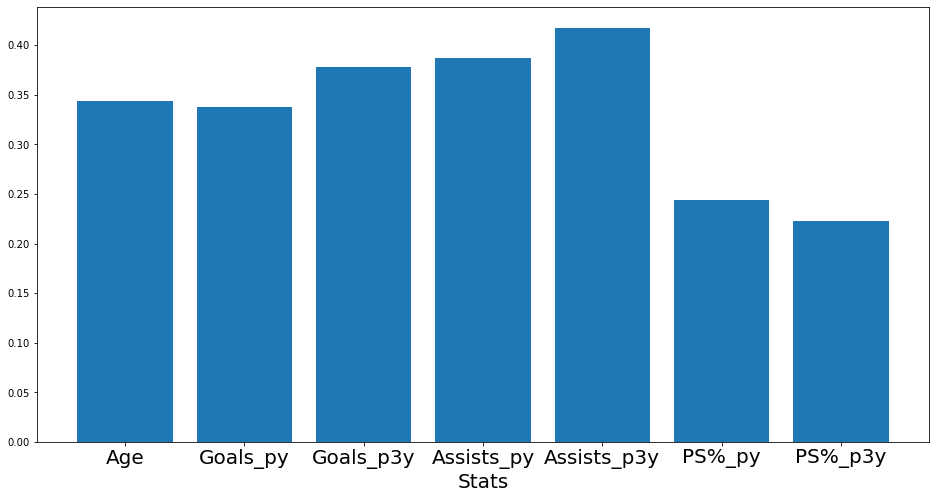

In [83]:
plt.figure(figsize=(16, 8))
plt.xlabel('Stats', fontsize=20)
plt.rc('xtick', labelsize=20)
x = np.arange(len(columns))
years = columns
value = values
plt.bar(x, value)
plt.xticks(x, years)
plt.show()

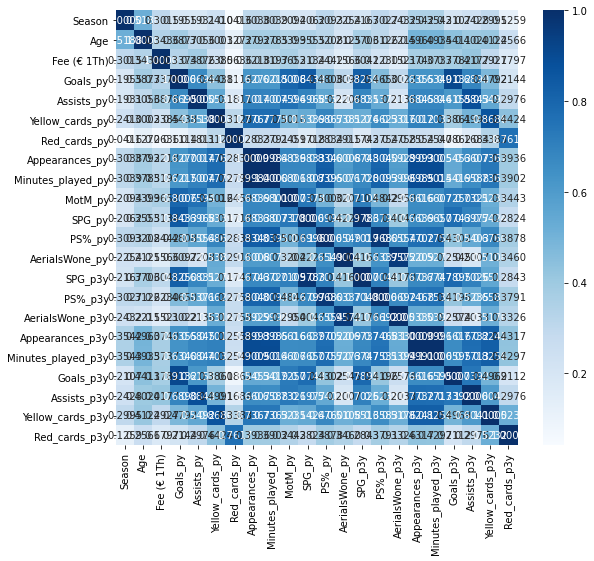

In [13]:
corr = fee_df.corr().iloc[2, :]
plt.figure(figsize=(9, 8))
sns.heatmap(data=corr, square=False, cmap='Blues', annot=True, fmt='.4f')
plt.show()